# Using Beefed-up clf version2

What i like about this new version is that it made norin's photos group and apparently I like myself alot. 

I should check by sending an email to adrian if this is the preferred method.

In [1]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from tsne import image_scatter_plot
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/friends_and_myself_pics_faces_encodings.pickle')


In [4]:
lr = pickle.load(open('lr_tinderlikes2.pickle','rb'))
lr

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

count    35.000000
mean      0.555332
std       0.203269
min       0.172136
25%       0.377763
50%       0.581551
75%       0.728681
max       0.910773
dtype: float64
skew --  -0.2569019277474134
kurtosis -- -1.0316864375783825


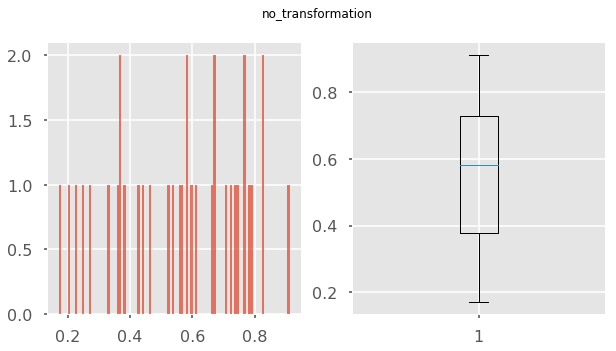

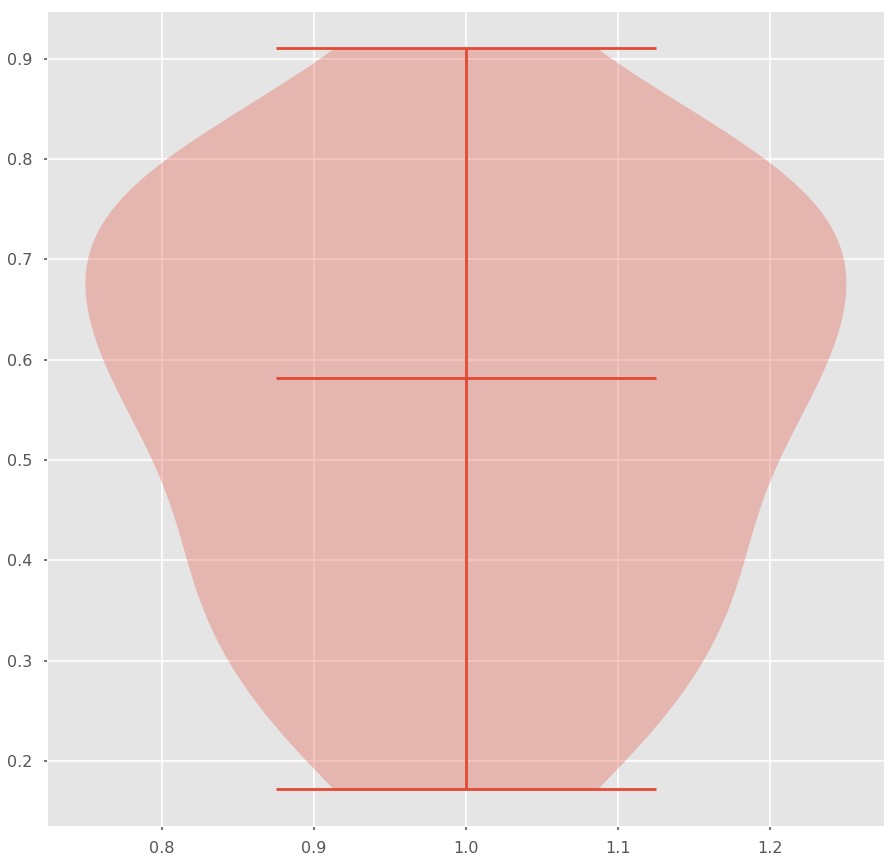

In [3]:

probas = pd.Series(lr.predict_proba(encodings)[:,1])
plot_distribution(probas)

In [5]:
num_of_bins = 5
sorted_imgs = sorted(zip(probas, arrays_rescaled), key=lambda x: x[0], reverse=True)
sorted_arrays_rescaled  = [img[1] for img in sorted_imgs]
sorted_probas = [img[0] for img in sorted_imgs]

bin_bounds = list(map(lambda x: x/100, list(range(0,100, int(100/num_of_bins)))))
bin_labels = pd.cut(sorted_probas, bins=bin_bounds, labels=list(range(1, num_of_bins )))


1
1


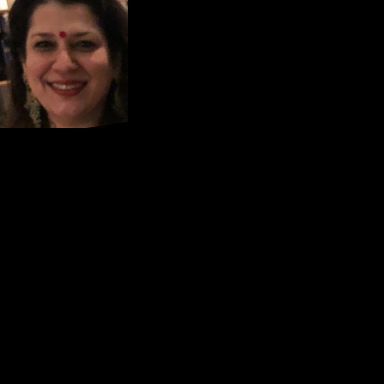

2
9


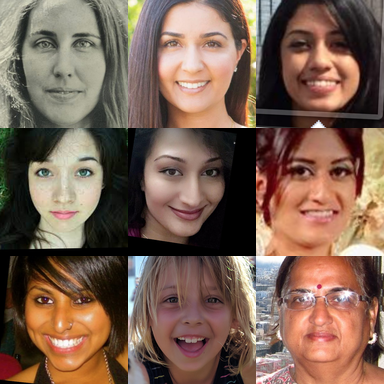

3
10


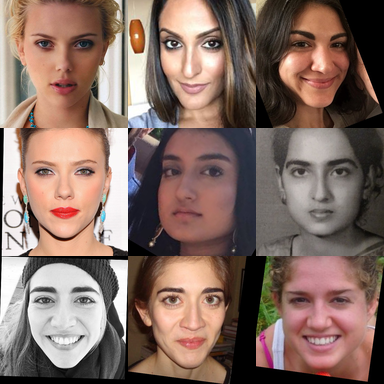

4
12


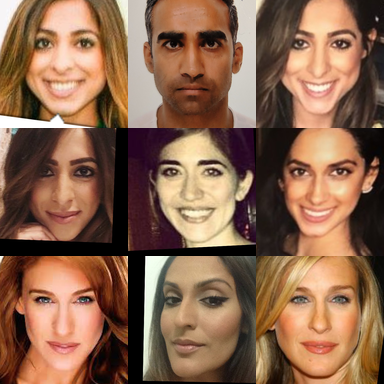

In [6]:
from image_helpers import _square_sizer

for cluster_idx in range(1, num_of_bins):
    print(cluster_idx)
    args = np.where(bin_labels== cluster_idx)[0]
    print(len(args))
    display(
        montagify([np.array(sorted_arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=(3,3)
    ))
    


1
1


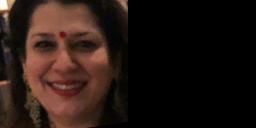

2
9


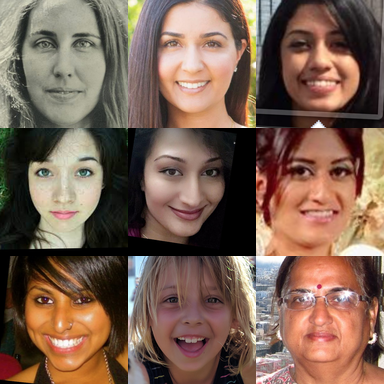

3
10


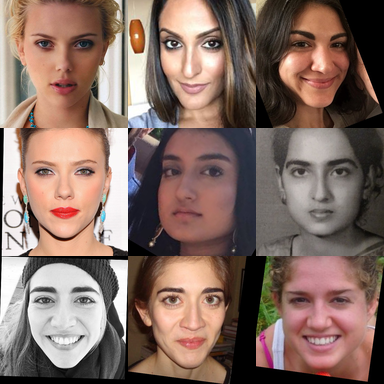

4
12


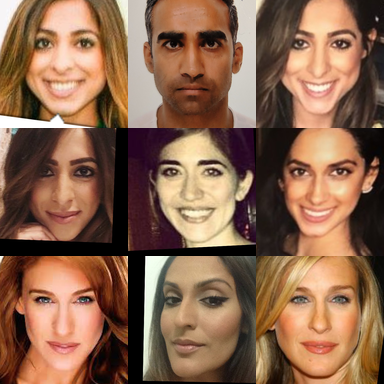

In [7]:

for cluster_idx in range(1, num_of_bins):
    print(cluster_idx)
    args = np.where(bin_labels== cluster_idx)[0]
    print(len(args))
    display(
        montagify([np.array(sorted_arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=_square_sizer(len(args))
    ))
    


# Individual rankings
scarlett johansen photo which scored very highly (but the rest of her photos tanked) One of amna also scored very highly but the other one was mundane.


The b/w photos seemed to have ranked much lower... try including only colored photos of people

What makes it not believable is when it shows amna just scatterd across the board --- 82 67 58. Perhaps she's using different make-up styles.. wouldn't be a surprise 


0.9107732638144057


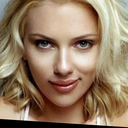

0.8263810149809411


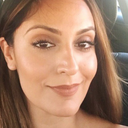

0.8245337433519205


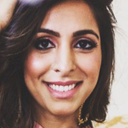

0.7870878388669476


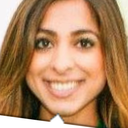

0.7792751993057817


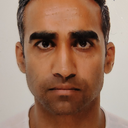

0.7695840685960613


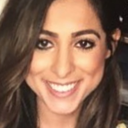

0.7657401940076278


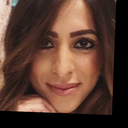

0.7461306387906014


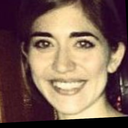

0.7347681423191974


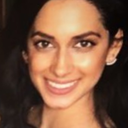

0.722594118001005


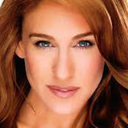

0.7109884746307025


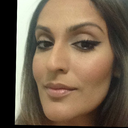

0.6720694623873796


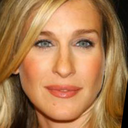

0.6692249353734145


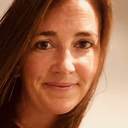

0.6650882783979927


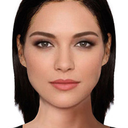

0.6137260014444571


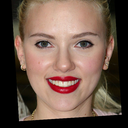

0.5997423430484304


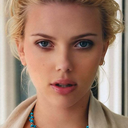

0.5829630809079956


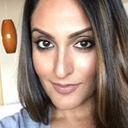

0.5815510499728614


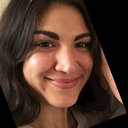

0.5668785608894082


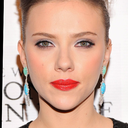

0.5597284936594349


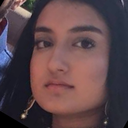

0.5396413183223976


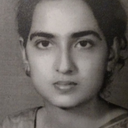

0.5221864482245596


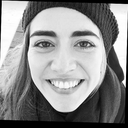

0.46533998700859963


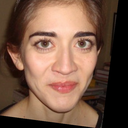

0.4439931904165968


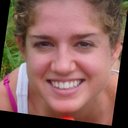

0.42943978493977597


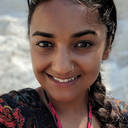

0.3850095857570897


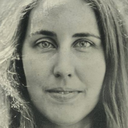

0.37051686708726617


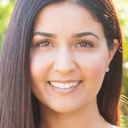

0.3678314338982623


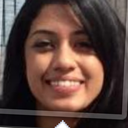

0.3629347992863296


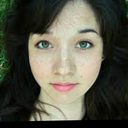

0.3308692864889376


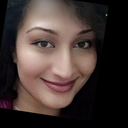

0.2736764753389559


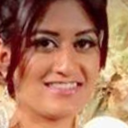

0.25139741264462356


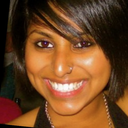

0.23008600776823288


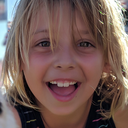

0.20273152068471953


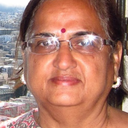

0.17213609441303288


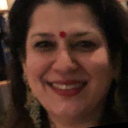

In [8]:
for idx in range(len(sorted_arrays_rescaled)):
    print(sorted_probas[idx])
    display(sorted_arrays_rescaled[idx])
    